# 80 Cereals - EDA

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv("./cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Knowing the dataframe

In [3]:
df.index

RangeIndex(start=0, stop=77, step=1)

In [4]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
df.shape

(77, 16)

# Cleaning the dataframe (ETL)

### Checking for nulls

In [8]:
for col_name in df.columns:
    print(f"Number of nulls in {col_name} = {df[col_name].isna().sum()}")

Number of nulls in name = 0
Number of nulls in mfr = 0
Number of nulls in type = 0
Number of nulls in calories = 0
Number of nulls in protein = 0
Number of nulls in fat = 0
Number of nulls in sodium = 0
Number of nulls in fiber = 0
Number of nulls in carbo = 0
Number of nulls in sugars = 0
Number of nulls in potass = 0
Number of nulls in vitamins = 0
Number of nulls in shelf = 0
Number of nulls in weight = 0
Number of nulls in cups = 0
Number of nulls in rating = 0


### Checking for odd data points

In [9]:
for col_name in df.columns:
    print(f"Range of values in '{col_name}' = {df[col_name].min()}, {df[col_name].max()}")

Range of values in 'name' = 100% Bran, Wheaties Honey Gold
Range of values in 'mfr' = A, R
Range of values in 'type' = C, H
Range of values in 'calories' = 50, 160
Range of values in 'protein' = 1, 6
Range of values in 'fat' = 0, 5
Range of values in 'sodium' = 0, 320
Range of values in 'fiber' = 0.0, 14.0
Range of values in 'carbo' = -1.0, 23.0
Range of values in 'sugars' = -1, 15
Range of values in 'potass' = -1, 330
Range of values in 'vitamins' = 0, 100
Range of values in 'shelf' = 1, 3
Range of values in 'weight' = 0.5, 1.5
Range of values in 'cups' = 0.25, 1.5
Range of values in 'rating' = 18.042851, 93.704912


👆 We can see that the columns, `carbo`, `sugars` and `potass` contain negative values.

Let's see which values exactly are negative:

In [10]:
df[df["carbo"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [11]:
df[df["sugars"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [12]:
df[df["potass"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816


### Running a script to replace negative values in these columns

In [13]:
unclean_columns = ["carbo", "sugars", "potass"] # have negative data values
for col_name in unclean_columns:
    temp_list = list(df[df[col_name] < 0].index) # list of indices at which -ve values occur in the column, `col_name`
    for index in temp_list:
        df[col_name].iloc[index] = 0

C:\Users\aumpa\AppData\Local\Temp\ipykernel_17808\1253479771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name].iloc[index] = 0


### Ensuring that all -ve values are removed

In [14]:
df[df["carbo"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [15]:
df[df["sugars"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [16]:
df[df["potass"] < 0]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


# Relationship between numeric variables

In [17]:
df_corr = df.corr(numeric_only=True) # pearson correlation coefficient
df_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.252349,0.564092,-0.066678,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.125337,-0.324112,0.549667,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318504,0.275086,0.193371,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.353990,0.096291,-0.032706,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.359297,-0.141225,0.903647,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.252349,-0.125337,-0.318504,0.353990,-0.359297,1.000000,-0.352835,-0.352861,0.257065,-0.107424,0.136016,0.365930,0.054436
sugars,0.564092,-0.324112,0.275086,0.096291,-0.141225,-0.352835,1.000000,0.022151,0.122000,0.096623,0.452308,-0.034450,-0.761732
potass,-0.066678,0.549667,0.193371,-0.032706,0.903647,-0.352861,0.022151,1.000000,0.020449,0.360974,0.416439,-0.495357,0.380534
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.257065,0.122000,0.020449,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.107424,0.096623,0.360974,0.299262,1.000000,0.190762,-0.335269,0.025159


<Axes: >

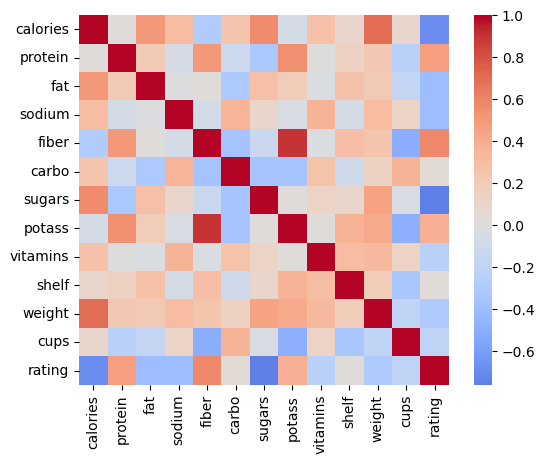

In [18]:
sns.heatmap(
    data = df_corr,
    center = 0.0,
    cmap = "coolwarm",
    annot = False,
    square = True
)

# `Observations`:

Based on the above heatmap,

* Customers strongly dislike foods which are high in **calories** and **sugars**.

* Customers mildly like foods that are high in **fiber** and **protein**.

# `Question:` Which cereal is the people's favourite?

In [19]:
df[df["rating"] == df["rating"].max()][["name", "mfr", "rating"]]

,name,mfr,rating
3,All-Bran with Extra Fiber,K,93.704912


# `Question:` Which company sells the most products?

In [20]:
temp_dict = {
    "A": "American Home Food Products",
    "G": "General Mills",
    "K": "Kelloggs",
    "N": "Nabisco",
    "P": "Post",
    "Q": "Quaker Oats",
    "R": "Ralston Purina"
}
temp_dict
mfr_names = pd.Series(temp_dict)
mfr_names
temp1 = df.groupby("mfr").count()["name"]
temp1
temp2 = df.groupby("mfr").mean(numeric_only=True)["rating"]
temp2
temp3 = pd.concat([mfr_names, temp1, temp2], axis=1)
temp3
temp3 = temp3.rename(columns={0: "Manufacturer", "name": "No. of products", "rating": "Average user rating"})
temp3

,Manufacturer,No. of products,Average user rating
A,American Home Food Products,1,54.850917
G,General Mills,22,34.485852
K,Kelloggs,23,44.038462
N,Nabisco,6,67.968567
P,Post,9,41.705744
Q,Quaker Oats,8,42.915990
R,Ralston Purina,8,41.542997


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'American Home Food Products'),
  Text(1, 0, 'General Mills'),
  Text(2, 0, 'Kelloggs'),
  Text(3, 0, 'Nabisco'),
  Text(4, 0, 'Post'),
  Text(5, 0, 'Quaker Oats'),
  Text(6, 0, 'Ralston Purina')])

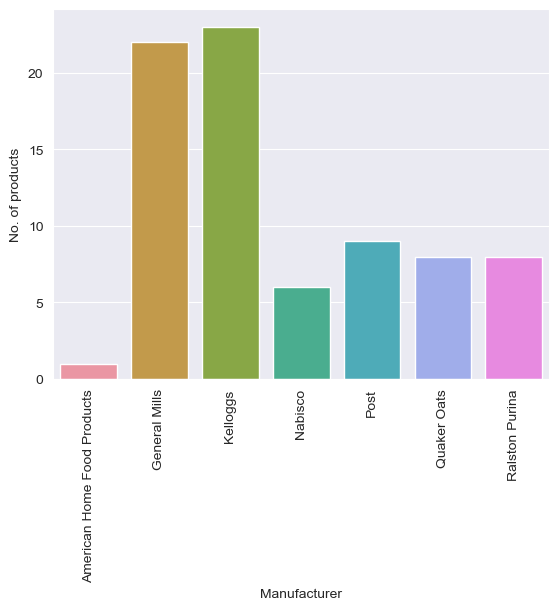

In [21]:
sns.set_style("darkgrid")
sns.set_palette("Blues")
sns.barplot(x='Manufacturer', y='No. of products', data=temp3)
plt.xticks(rotation=90)

### Percentage product share

In [22]:
temp3

,Manufacturer,No. of products,Average user rating
A,American Home Food Products,1,54.850917
G,General Mills,22,34.485852
K,Kelloggs,23,44.038462
N,Nabisco,6,67.968567
P,Post,9,41.705744
Q,Quaker Oats,8,42.915990
R,Ralston Purina,8,41.542997


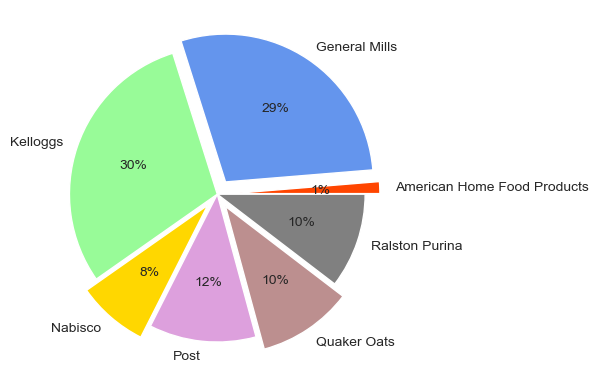

In [23]:
data = temp3["No. of products"].values
keys = temp3["Manufacturer"].values
  
# declaring exploding pie
explode = [0.1, 0.1, 0, 0.1, 0, 0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('husl')
colors = ["orangered", "cornflowerblue", "palegreen", "gold", "plum", "rosybrown", "grey"]
# colors=["orangered", "cornflowerblue", "cornflowerblue", "palegreen", "palegreen", "palegreen", "palegreen"]

plt.pie(
    data,
    labels=keys,
    colors=colors,
    autopct='%.0f%%',
    explode = explode
)

# displaying chart
plt.show()

# `Question:` Which company's products have a higher average-rating?

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'American Home Food Products'),
  Text(1, 0, 'General Mills'),
  Text(2, 0, 'Kelloggs'),
  Text(3, 0, 'Nabisco'),
  Text(4, 0, 'Post'),
  Text(5, 0, 'Quaker Oats'),
  Text(6, 0, 'Ralston Purina')])

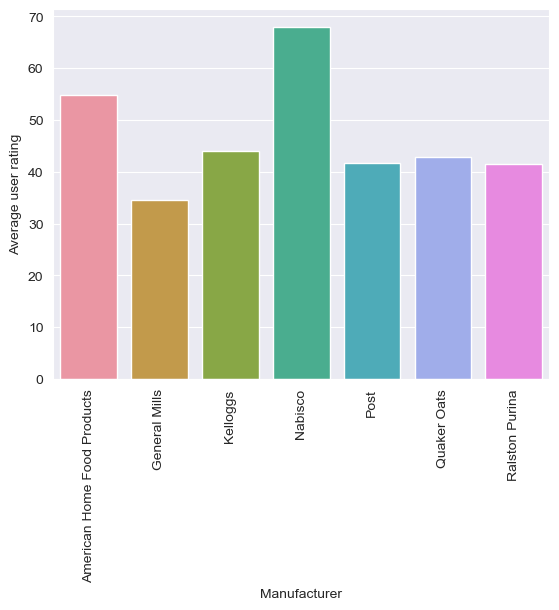

In [24]:
sns.set_style("darkgrid")
sns.color_palette("flare", as_cmap=True)
sns.barplot(x='Manufacturer', y='Average user rating', data=temp3)
plt.xticks(rotation=90)

# `Question:` Which company has the highest effective rating?

In [25]:
temp3["Rating per product"] = temp3["Average user rating"] / temp3["No. of products"]
temp3

,Manufacturer,No. of products,Average user rating,Rating per product
A,American Home Food Products,1,54.850917,54.850917
G,General Mills,22,34.485852,1.567539
K,Kelloggs,23,44.038462,1.914716
N,Nabisco,6,67.968567,11.328095
P,Post,9,41.705744,4.633972
Q,Quaker Oats,8,42.915990,5.364499
R,Ralston Purina,8,41.542997,5.192875


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'American Home Food Products'),
  Text(1, 0, 'General Mills'),
  Text(2, 0, 'Kelloggs'),
  Text(3, 0, 'Nabisco'),
  Text(4, 0, 'Post'),
  Text(5, 0, 'Quaker Oats'),
  Text(6, 0, 'Ralston Purina')])

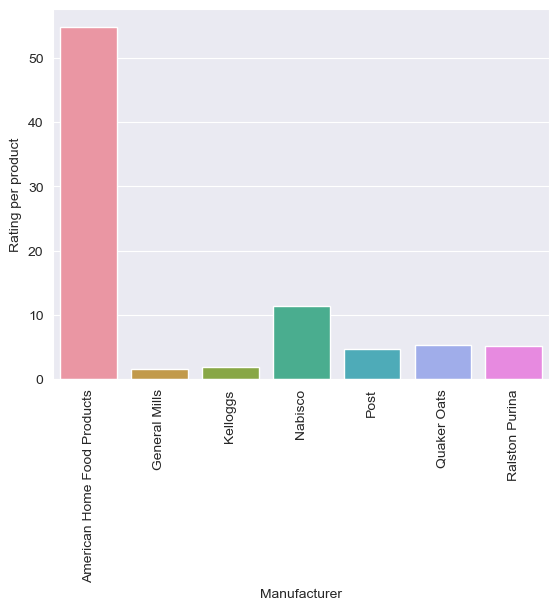

In [26]:
sns.set_style("darkgrid")
sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Manufacturer', y='Rating per product', data=temp3)
plt.xticks(rotation=90)

# `Question:` How do calories vary with sugar and fat?

In [27]:
temp1 = df[["calories", "sugars", "fat"]]
temp1

,calories,sugars,fat
0,70,6,1
1,120,8,5
2,70,5,1
3,50,0,0
4,110,8,2
...,...,...,...
72,110,3,1
73,110,12,1
74,100,3,1
75,100,3,1


<Axes: xlabel='fat', ylabel='calories'>

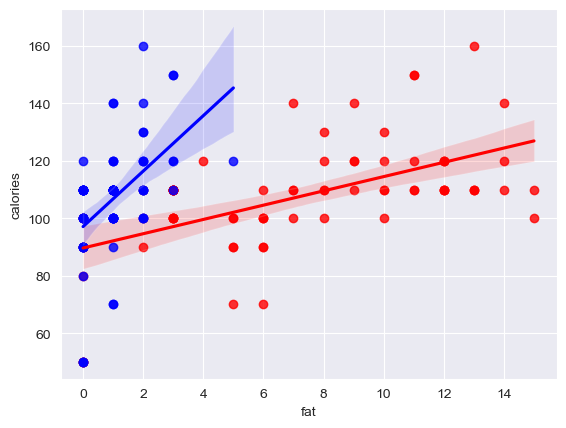

In [28]:
sns.set_style("darkgrid")
sns.color_palette("hls", 8)
sns.regplot(x='sugars', y='calories', data=temp1, color="red")
sns.regplot(x='fat', y='calories', data=temp1, color="blue")

# `Question:` What percentage of cereals are to be served hot?

In [29]:
temp = df["type"].value_counts()
temp

C    74
H     3
Name: type, dtype: int64

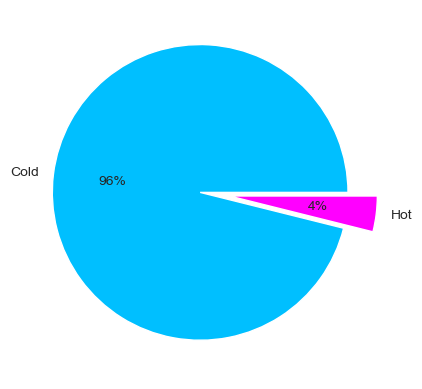

In [30]:
data = temp.values
keys = ["Cold", "Hot"]
  
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('husl')
  
# plotting data on chart
# plt.pie(data, labels=keys, colors=palette_color,
#         explode=explode, autopct='%.0f%%')

plt.pie(
    data,
    labels=keys,
    colors=["deepskyblue", "fuchsia"],
    autopct='%.0f%%',
    explode = [0.1, 0.1]
)
  
# displaying chart
plt.show()

---

# `Question:` What should be the top 5 choices for breakfast?

A good breakfast contains high amounts of fat and protein and low amount of carbs.

Let's consider "high" to be a value greater than the 75th percentile and "low" to be a value lower than 25th percentile. We won't be considering absolute recommended values of nutrients, but do a relative analysis.

Finding the quartiles of protein, fat and carbo:

We want **lower** quartile of `carbo`

We want **higher** quartiles of `protein` and `fat`

In [31]:
df["protein"].describe()
q1 = df["protein"].describe()["75%"]
print(f"3rd quartile of protein value = {q1}")

3rd quartile of protein value = 3.0


In [32]:
df["fat"].describe()
q2 = df["fat"].describe()["75%"]
print(f"3rd quartile of fat value = {q2}")

3rd quartile of fat value = 2.0


In [33]:
df["carbo"].describe()
q3 = df["carbo"].describe()["25%"]
print(f"1st quartile of carbo value = {q3}")

1st quartile of carbo value = 12.0


In [34]:
temp = df[(df["protein"] >= q1) & (df["fat"] >= q2) & (df["carbo"] <= q3)]
temp
temp = temp[["name", "protein", "fat", "carbo"]].sort_values(
    axis="index",
    by="carbo",
    ascending=True
)
temp

,name,protein,fat,carbo
57,Quaker Oatmeal,5,2,0.0
1,100% Natural Bran,3,5,8.0
19,Cracklin' Oat Bran,3,3,10.0
59,Raisin Nut Bran,3,2,10.5
27,Fruit & Fibre Dates; Walnuts; and Oats,3,2,12.0
41,Life,4,2,12.0


In [35]:
temp = pd.melt(temp, id_vars="name", var_name="Nutrient", value_name="Value") # unpivoting

In [36]:
temp.head(10)

,name,Nutrient,Value
0,Quaker Oatmeal,protein,5.0
1,100% Natural Bran,protein,3.0
2,Cracklin' Oat Bran,protein,3.0
3,Raisin Nut Bran,protein,3.0
4,Fruit & Fibre Dates; Walnuts; and Oats,protein,3.0
5,Life,protein,4.0
6,Quaker Oatmeal,fat,2.0
7,100% Natural Bran,fat,5.0
8,Cracklin' Oat Bran,fat,3.0
9,Raisin Nut Bran,fat,2.0


Text(0, 0.5, 'Nutrient content')

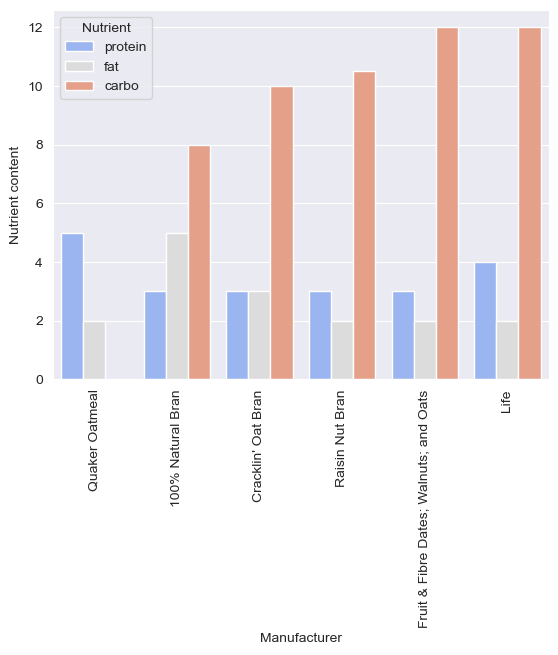

In [37]:
ax = sns.barplot(x='name', y='Value', hue='Nutrient', data=temp, palette="coolwarm")
plt.xticks(rotation=90)
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Nutrient content")

# `Question:` Which cereal will satisfy your daily vitamin requirements?

In [38]:
df[df["vitamins"] == 100][["name", "vitamins", "protein", "fat", "carbo", "rating"]].sort_values(
    by = ["protein", "fat", "carbo", "rating"],
    ascending = [False, False, True, False]
).reset_index(inplace=False)

,index,name,vitamins,protein,fat,carbo,rating
0,70,Total Raisin Bran,100,3,1,15.0,28.592785
1,71,Total Whole Grain,100,3,1,16.0,46.658844
2,39,Just Right Fruit & Nut,100,3,1,20.0,36.471512
3,53,Product 19,100,3,0,20.0,41.503540
4,38,Just Right Crunchy Nuggets,100,2,1,17.0,36.523683
5,69,Total Corn Flakes,100,2,1,21.0,38.839746


# Conclusions

* Customers strongly dislike foods which are high in **calories** and **sugars**.

* Customers mildly like foods that are high in **fiber** and **protein**.

* **General Mills** and **Kelloggs** sell the most number of cereal products, making up **59%** of the products on the shelves.

* **American Home Food Products** and **Nabisco** are reputed cereal brands.

* **Nabisco** is the most reputed cereal brand with an average rating of almost **70%**

* **American Home Food Products** have exceptionally high rated cereal products, with an average rating of **50%** *per product*.

* High sugar and high fat content leads to high calorie content, as expected.

* **96%** of the cereals sold in this supermarket are to be served **hot**.

* **Quaker Oatmeal** by **Quaker Oats** is the best *high-fat* and *high-protein* cereal.

* **Total Raisin Bran** by **General Mills** provides you with all the vitamins you need for the day.

* **Kellogs** makes the people's most favourite cereal, **All-Bran with Extra Fiber**, with a rating of **93.7%**.